# Assignment 3: *Deutsch-Jozsa* Algorithm and its Application

The purpose of this assignment is to introduce the problems that motivated *Deutsch-Jozsa* Algorithm and then to explain the algorithm themselves. The assignment would give examples of the implementation of the algorithm as well and then lead up to the main problem of the assignment - **predicting the price of a real estate property using the Deutsch-Jozsa Algorithm**.

---
## Deutsch-Jozsa Algorithm

### The Formal Problem: 

**For given an oracle function $f : {0, 1}^n -> {0, 1}$, determine $f$ is balanced or constant.**

Consider a function $f(x)$ that takes as input n-bit strings $x$ and returns $0$ or $1$. Suppose we are promised that $f(x)$ is either a constant function that takes the same value $c$ in ${0,1}$ on all inputs $x$, or a balanced function that takes each value $0$ and $1$ on exactly half of the inputs. The goal is to decide whether $f$ is constant or balanced by making as few function evaluations as possible. Classically, it requires $2^{n-1}+1$ function evaluations in the worst case. Using the Deutsch-Jozsa algorithm, the question can be answered with just one function evaluation.
    
### The Problem Explained:

The problem which it aims to solve is the following. Let’s say you have a “black box function” (some kind of unknown function)— which you know must either be “constant” (returning the same value for any input) or “balanced” (returning one of two different outputs with equal probability). You want to figure out which of the two it is.
Now of course, this at first glance, may seem like a pretty impractical problem. And in the grand scheme of things, it probably is.

But, let’s consider how long it would take a classical computer to solve this problem. Our best case scenario would be two queries (i.e. passing two numbers through the function), because if we get two different answers, we know it must be balanced. But, say the classical computer keeps getting the same output. If the function has $n$ possible inputs, the classical computer would have to try just over half of all possible inputs $(2^{(n-1)} + 1$, to be specific) until it can be absolutely certain that that is the only possible answer.
For small values of $n$, this might not seem like a significant number. But, as n increases, $2^{(n-1)} + 1$ does so as well… exponentially.

A quantum computer on the other hand, can solve this problem using **just one query regardless of how many possible inputs the function has**. So, while the problem the computer is trying to solve is realistically impractical, it is interesting because it demonstrates the very essence of what we hope quantum computers will be able to one day do.


### Balanced/Constant Functions:

The quantum oracle used in the Deutsch-Jozsa algorithm is a black box function that must be either constant or balanced. For an unknown Oracle $U_f$, given input value $|x_n>$, the output will be $|y \bigoplus x_n>$, where $\bigoplus$ denotes addition modulo 2 operator. That is, if $y = 0$ then the output is simply $f(x)$.

![pic](pic/circ.png)

A function $$ f \{0,1\}\rightarrow \{0,1\} $$

is said to be balanced if $$ f(0) \ne f(1) $$ and constant if $$ f(0) = f(1) $$

---
## High Level Algorithm:

The algorithm itself is pretty straight forward and is summarized as follows:

1. Initialize two quantum registers (sets of qubits). The first consists of n qubits each initialized to $|0>$. The second just has one qubit (called *ancilla*) initialized to $|1>$.
2. Apply Hadamard gates to each qubit in both registers.
3. Pass it through the quantum oracle (the black box function).
4. Apply the Hadamard gate to each qubit in the first register.
5. Measure each qubit in the first register, thus measuring the overall quantum state.
6. If we measure the state $|00…0>$, we know it is **constant**. If we measure anything else, we know it is **balanced**.

---

### Explanation of the Algorithm:

First, let’s consider this question intuitively. Let’s say we have a constant function. In this case, applying the function doesn’t change the quantum state’s relative phase — if we were to model that state as a vector, applying the function wouldn’t rotate the vector. The Hadamard gate has the handy quality of being it’s own inverse, and so applying it to a qubit two times in succession, will return it to it’s initial state. So, doing that to all the qubits in the first register maintains the state $|000…0>$. The ancilla is added to the circuit to make sure that the Oracle $U_f$ is reversible which is a necessary component to be a quantum gate.

![a](pic/a.png)

On the other hand, when the oracle is balanced, applying it to the state will change its relative phase and hence its state. This means that applying the Hadamard gate a second time will not return it to it’s initial state of $|000…0>$.


And so, in the measurement stage, if we get $|000…0>$, we know our quantum oracle must be constant. If we get anything else, we know it must be balanced.

Mathematically, we can take a look at the state after we impose each step. First, when we initialize our registers, our state looks like

![b](pic/b.png)

because we have n qubits in state $|0>$ and one in state $|1>$.
Then, after we apply the first round of hadamard gates, we have

![c](pic/c.png)

Third, when we pass it through the quantum oracle — which we represent using $f(x)$ — we get

![d](pic/d.png)

And finally, after implementing the last set of hadamard gates, we get

![e](pic/e.png)

Notice that because of the Born rule, the probability of measuring this state as $|00….0>$ is

![f](pic/f.png)


If $f(x)$ is constant, then it will either always be 0 or always be 1. If f(x)=0, then all of the $(-1)^{f(x)}$ evaluate to 1, and the overall result is 1. If f(x)=-1, then all of the (-1)^f(x) evaluate to -1, and still the overall result is 1, because we are taking an absolute value. So, if $f(x)$ is constant, we have a $100%$ chance of measuring $|00…0>$.
On the other hand, if $f(x)$ is balanced, it will be 0 or 1 with equal probability and so the $(-1)^{f(x)}$ terms will collectively cancel out and we get 0 — that is, a $0%$ chance of getting $|000…0>$.


### Implementation of the Algorithm:

I will show the implementation of the algorithm for an Oracle function that is balanced.

**More on** [Deutsch-Jozsa Algorithm](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html)

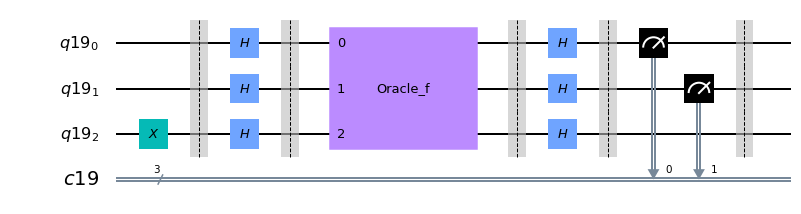

In [59]:
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram

qr = QuantumRegister(3)  # Initialize qubits
cr = ClassicalRegister(3)  # Initialize bits for record measurements
circuit = QuantumCircuit(qr, cr)

circuit.x(qr[2])  # initialize the ancilla qubit in the |1> state

circuit.barrier()

# First step of quantum algorithms - Prepare the superposition
# For superposition, we apply the Hadamard gate on all qubits
circuit.h(qr[0])
circuit.h(qr[1])
circuit.h(qr[2])

circuit.barrier()

# Oracle function
def oracle(n):
    qc = QuantumCircuit(n)
    qc.i(0)
    qc.i(1)
    qc.i(2)
  #  qc.h(0)
  #  qc.cx(1, 0)
  #  qc.z(2)
  #  qc.h(0)
    gate = qc.to_gate()
    gate.name = "Oracle_f"
    return  gate
    
"""
#These are the gates needed to make the oracle
circuit.h(qr[0])
circuit.cx(qr[1], qr[0])
circuit.z(qr[2])
circuit.h(qr[0])
"""

circuit.append(oracle(3), range(3)) 

circuit.barrier()

# Apply Hadamard gates after querying oracle function
circuit.h(qr[0])
circuit.h(qr[1])
circuit.h(qr[2])

circuit.barrier()

# Measure qubit
circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[1])

circuit.barrier()
circuit.draw("mpl")

Simulator result
000 is observed in 1 times


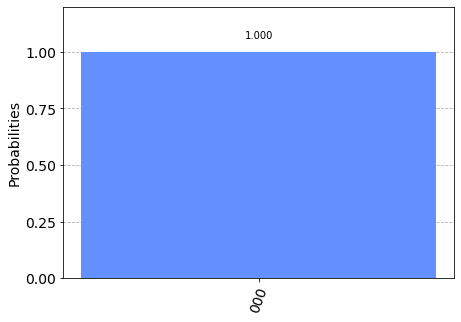

In [61]:
# Run our circuit with local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1
results = execute(circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

print("Simulator result")
for c2c1c0 in answer:
    print(f"{c2c1c0} is observed in {answer[c2c1c0]} times")
    
# If we measure |0>^n, then f is constant, other results tell us that f is balanced
plot_histogram(answer)

Since the measured states are not $|000>$ or $|111>$ for all input states. It verifies that the Oracle was indeed not a **constant** function but a **balanced** function.

## Assignment 3.1: 
### a) What is the purpose of the *ancilla qubit*?

`
ENTER YOUR ANSWER HERE!
`

### b) Given the following Input/Output (I/O) relation which of these functions are balanced and which of them are constant?:

1. $F_1(x)$ :: Inputs = $|000> |001> |010>$, Outputs = $|000>$
2. $F_2(x)$ :: Inputs = $|000> |001> |010>$, Outputs = $|010>$
3. $F_3(x)$ :: Inputs = $|000> |001> |010>$, Outputs = $|110>$
4. $F_4(x)$ :: Inputs = $|000> |001> |010>$, Outputs = $|111>$

`
ENTER YOUR ANSWER HERE!
`

--------
## Application of Deutsch-Jozsa Algorithm: *Predicting Real Estate Price Rise/Fall*

This section outlines an example that you would need to understand to complete **Assignment 3.2**. We use the Deutsch-Jozsa algorithm framework to predict whether a real estate price will rise or fall. For this example, I used a public dataset on Texas State real estate market made available by google.

Here is the high level overview of the algorithm:

1. Import the data 
2. Create a pandas data frame using the data (learn more about pandas library: [Youtube Link](https://www.youtube.com/watch?v=dcqPhpY7tWk)
3. Create an initial qubit state $|110>$ (arbitrarily chosen)
4. Apply X gate on the ancilla qubit 
5. Apply H gates on all the qubits for creating superposition
6. Apply the Oracle (CNOT Gate with control qubit 2 and target qubit 4 (ancilla) or X gate on qubit 4 (ancilla) based on condition )
7. Apply H gates to the qubits (without the ancilla)
8. Measure the qubits into the classical bits

**Note:** The above high level algorithm is a general framework to solve other problems of the same class.

---
### Explanation of algorithm
Let’s consider a function that can predict whether the Texas housing price will increase or decrease for a given year. $$f(x,years)$$
x is a binary variable of 1 or 0 and years is the number of years we want to predict its value. So we want an algorithm that works this way. $$f(x, years) = f(x)$$ That is:

If function is constant
$$f(0) = f(1)$$
then Texas housing price will increase for that year.
If
$$f(0) \ne f(1)$$
then the Texas housing price will decrease for that year

Now lets read the Texas State real estate data.

In [17]:
import pandas as pd
tx_real_estate_df = pd.read_csv("texas_housing.csv") 

### DataFrame Check

The following is the dataframe created using the `texas_housing.csv` file.

In [18]:
tx_real_estate_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import qiskit
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np

## Create the standard circuit for the Deutsch-Jozsa algorithm 

We use three qubits in the state $|110>$ as our input to the Deutsch-Jozsa algorithm circuit. As discussed above, we want to use the principle of superposition of quantum states to create a quantum parallelism. Applying hadamard gate as denoted as `H` in the code below put the system into a superposition.

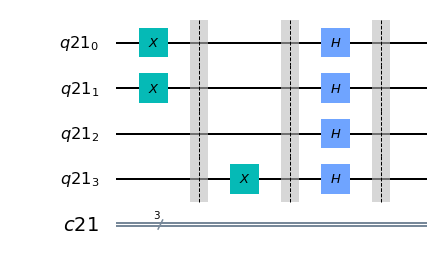

In [69]:
# using three qubits and 1 ancilla qubit
nbit = 3
qr = QuantumRegister(nbit+1)
cr = ClassicalRegister(nbit)  

PredictionCircuit = QuantumCircuit(qr,cr)

#using the input state as |110> (chosen arbitrarily)
PredictionCircuit.x(0)
PredictionCircuit.x(1)

PredictionCircuit.barrier()

# initialize the ancilla qubit in the |1> state
PredictionCircuit.x(qr[nbit])

PredictionCircuit.barrier()

# First step of quantum algorithms - Prepare the superposition
# For superposition, we apply the Hadamard gate on all qubits
PredictionCircuit.h(qr)

PredictionCircuit.barrier()

PredictionCircuit.draw("mpl")

## Reading Data and Making Prediction

Now that this code is implementing Deutsch-Jozsa’s algorithm to make a prediction. As explained earlier, if $f(0) = f(1)$, the housing price will increase. This is how the the quantum oracle goes. Let’s say today is 100 years as shown in the code below, if the housing price of the year we are predicting is greater than that of today, the circuit apply a NOT gate on the fourth gate. This gives us a constant value every time making sure
$$f(0) = f(1)$$
The second condition is that if 
$$f(0) \ne f(1)$$
then apply a CNOT gate. The control of the CNOT can be on any of the three qubits, and the target on the fourth qubit.

In [70]:
N = 22 # randomly chosen number

CurrentYear = len(tx_real_estate_df["median_house_value"])/170
#print(CurrentYear)
PredictedYearValue = 0
CurrentYearValue = tx_real_estate_df["median_house_value"][CurrentYear]
#print(CurrentYearValue)

for i, j in enumerate(tx_real_estate_df["median_house_value"]):
    i = N
    PredictedYearValue = tx_real_estate_df["median_house_value"][i]

print("Predicted: ", PredictedYearValue)
print("Current: ", CurrentYearValue)

PredictedYearValue = 20000000

if PredictedYearValue > CurrentYearValue:
    PredictionCircuit.x(3)
    
elif CurrentYearValue > PredictedYearValue :
    PredictionCircuit.cx(qr[nbit-2],qr[nbit])
    
else:
    print("Invalid")

Predicted:  50000.0
Current:  159900.0


The output shows that the Predicted value will be less than the current value. That is,
$$f(0) \ne f(1)$$

The following is what the completed circuit looks like.

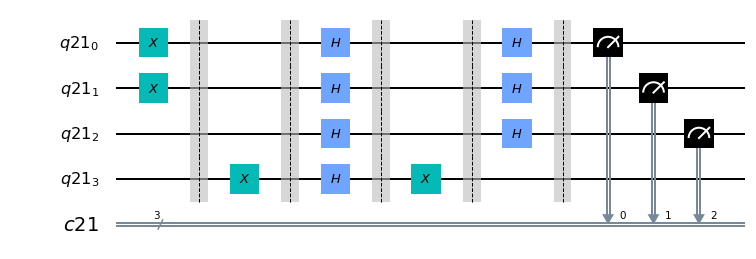

In [71]:
PredictionCircuit.barrier()
    
for i in range(nbit):
    PredictionCircuit.h(i)


PredictionCircuit.barrier()

for i in range(nbit):
    PredictionCircuit.measure(qr[i],cr[i])
    
PredictionCircuit.draw("mpl")

## Measuring the qubit state

Lastly, let’s make a plot and see the output of our prediction. We input 110, we get the output of 001 in 1 shot. 

Simulator result:
{'011': 1}


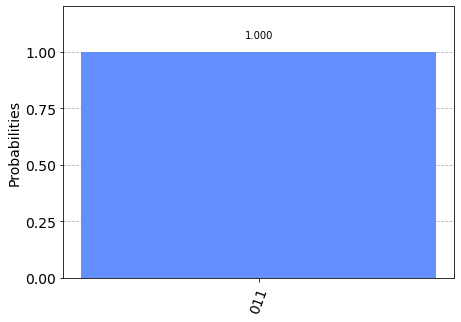

In [72]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1
results = execute(PredictionCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
print("Simulator result:")
print(answer)
plot_histogram(answer)

## Result Interpretation

This shows that $f(x)$ is balanced, and our predicted housing price will decrease.

## Assignment 3.2:

Using the example explained in the above section, implement such an algorithm/scheme for a data file of your choice to conduct a similar predictive analysis project.

**NOTE:** This assignment can be as simple as getting a similar real estate csv file and rerunning the code to much more complicated test cases such as trying to predict Energy levels of Lithium Hydride. 

**NOTE 2:** For those of us that may be torn between taking the easy route and the difficult route. Here's some inspiration:

- stock closing price instead of real estate
- price of some commodity listed on some ecommerce platform
- chances of a certain word being used in a book


In [107]:
"""
YOUR CODE HERE
"""

'\nYOUR CODE HERE\n'

## Optional Task
### Can you design an oracle function that acts as a constant function? If so implement such a circuit.

In [106]:
"""
YOUR CODE HERE
"""

'\nYOUR CODE HERE\n'